In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 

from sklearn.preprocessing import MinMaxScaler

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
df.type.unique()

array(['house', 'apartment', 'studio', 'townhouse'], dtype=object)

In [6]:
value_list = ['house','townhouse']

In [7]:
df=df[df.type.isin(value_list)]

In [8]:
df.type.unique()

array(['house', 'townhouse'], dtype=object)

In [9]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')
# thse change depending on the thing we're looking at 
df=df.drop(columns='floor') 
#df=df.drop(columns='connection') 
#df=df.drop(columns='balcony') 

In [10]:
df.isna().sum()

Distance Eyre Square     0
Distance Salthill        0
Distance NUIG            0
Distance GMIT            0
number of rooms          0
number of bathrooms      0
price per month          0
type                     0
connection              22
BER                      3
balcony                  0
heating                  1
dtype: int64

In [11]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,heating
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,house,NaN,d2,no,central
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,house,NaN,a3,no,central
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,house,NaN,d1,no,central
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,house,NaN,c3,no,central
7,3.430798,1.602936,3.073510,5.870060,4,2,2000,house,NaN,c2,yes,central


In [13]:

df = df.dropna() 

In [14]:
df=df.drop(columns='type') 

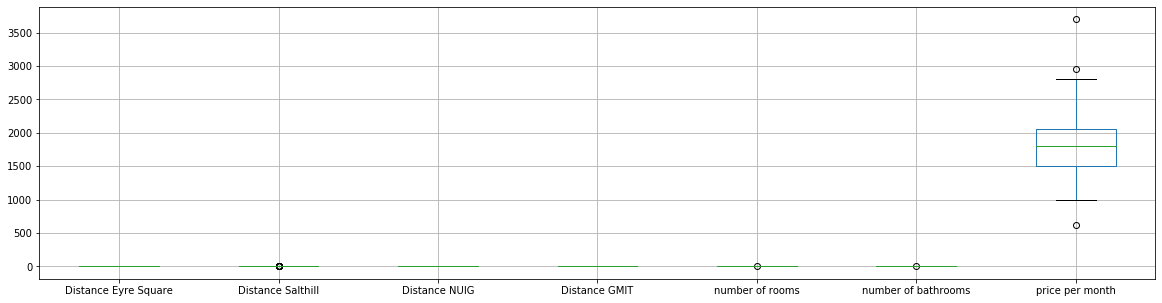

In [15]:
df.boxplot(figsize=(20,5))
plt.show() 

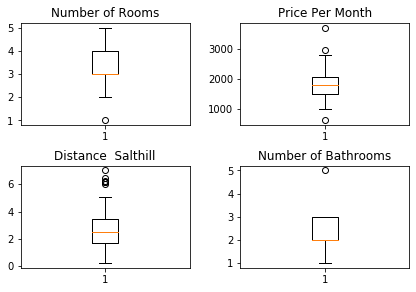

In [17]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['number of bathrooms'])
axs[1, 1].set_title('Number of Bathrooms')

axs[1, 0].boxplot(df['Distance Salthill'])
axs[1, 0].set_title('Distance  Salthill')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

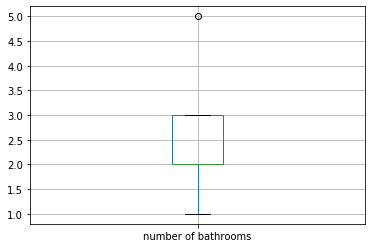

In [18]:
df.boxplot(column='number of bathrooms')
plt.show()

large house with 5 bathrooms?

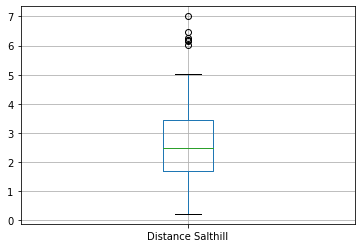

In [20]:
df.boxplot(column='Distance Salthill')
plt.show()

things can be far away from certain palces 


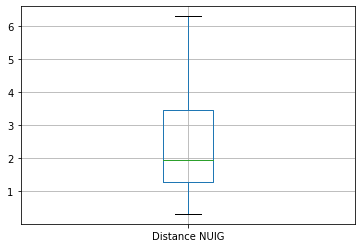

In [21]:
df.boxplot(column='Distance NUIG')
plt.show()

far away from stuff, 

In [22]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.537873,2.702803,2.387336,3.998515,3.460938,2.203125,1835.054688
std,1.445358,1.399539,1.383277,2.094466,0.782710,0.746217,457.764257
min,0.007512,0.222579,0.311939,0.287843,1.000000,1.000000,620.000000
25%,1.528295,1.711574,1.265292,2.369964,3.000000,2.000000,1500.000000
50%,2.414687,2.474440,1.956178,4.029597,3.000000,2.000000,1800.000000
75%,3.789077,3.437742,3.472265,5.353093,4.000000,3.000000,2057.500000
max,5.477031,7.005967,6.308555,8.012278,5.000000,5.000000,3700.000000


things seem to be closer to the collage in this one 

In [23]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,connection,BER,balcony,heating
13,2.446769,1.037478,1.917976,4.984487,4,3,2800,detached,c1,no,central
17,2.627352,1.430638,1.954203,5.180881,3,3,1500,detached,d1,no,central
18,1.907742,1.782552,0.975157,4.370977,3,1,1300,attached,b3,no,central
19,1.202837,0.697378,1.359845,3.586343,5,2,2500,detached,d2,no,central
21,0.007512,1.896556,1.000928,2.549793,3,2,620,attached,b3,yes,central


In [24]:
df.BER.unique()

array(['c1', 'd1', 'b3', 'd2', 'c2', 'exempt', 'b1', 'f', 'c3', 'b2',
       'e1', 'a3', 'g'], dtype=object)

In [25]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,connection,BER,balcony,heating
384,0.274648,2.079926,1.260954,2.291622,2,3,2000,attached,4,yes,central
385,0.067139,1.862889,0.935101,2.610332,4,2,2080,attached,0,yes,electric
387,1.844155,3.701195,2.156375,1.897147,1,1,1000,detached,8,no,central
388,4.478571,6.195593,5.269398,1.934727,3,2,1450,detached,9,no,central
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,detached,6,no,central


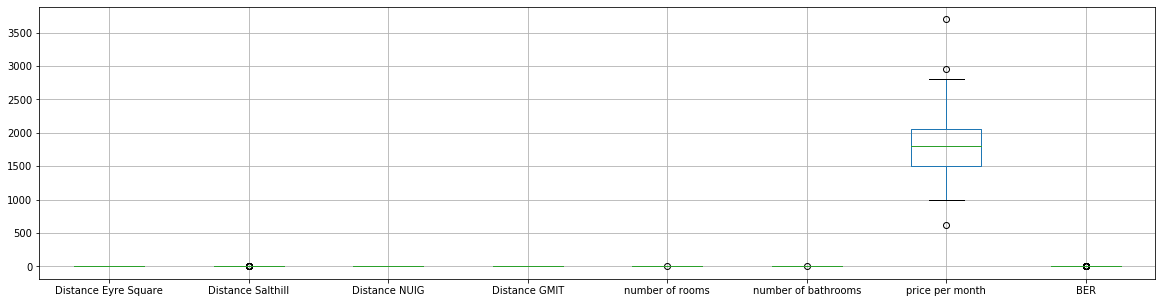

In [26]:
df.boxplot(figsize=(20,5))
plt.show()

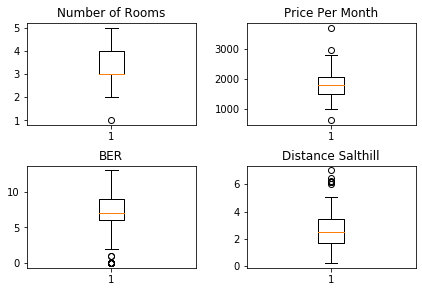

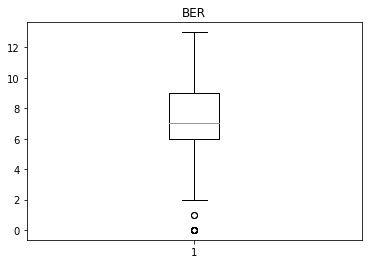

In [29]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['Distance Salthill'])
axs[1, 1].set_title('Distance Salthill')

axs[1, 0].boxplot(df['BER'])
axs[1, 0].set_title('BER')


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

fig, ax = plt.subplots()
ax.boxplot(df['BER'])
ax.set_title('BER')
plt.show()


In [30]:
df = pd.get_dummies(df, columns=['connection','balcony','heating'])
df.tail()



,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,connection_lone,balcony_no,balcony_yes,heating_central,heating_electric
384,0.274648,2.079926,1.260954,2.291622,2,3,2000,4,1,0,0,0,1,1,0
385,0.067139,1.862889,0.935101,2.610332,4,2,2080,0,1,0,0,0,1,0,1
387,1.844155,3.701195,2.156375,1.897147,1,1,1000,8,0,1,0,1,0,1,0
388,4.478571,6.195593,5.269398,1.934727,3,2,1450,9,0,1,0,1,0,1,0
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,6,0,1,0,1,0,1,0


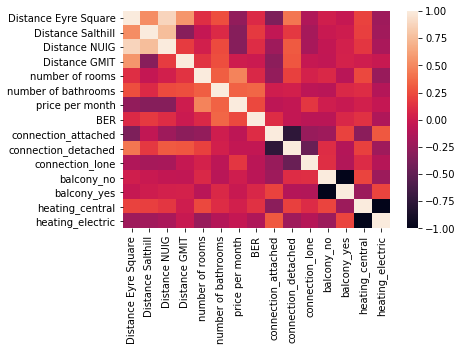

In [31]:
sns.heatmap(df.corr());

In [32]:
del df['balcony_no']

In [33]:
del df['heating_central']

In [34]:
del df['connection_lone']

balcony_yes, heating_central, connection_lone

In [35]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,balcony_yes,heating_electric
13,2.446769,1.037478,1.917976,4.984487,4,3,2800,9,0,1,0,0
17,2.627352,1.430638,1.954203,5.180881,3,3,1500,6,0,1,0,0
18,1.907742,1.782552,0.975157,4.370977,3,1,1300,10,1,0,0,0
19,1.202837,0.697378,1.359845,3.586343,5,2,2500,5,0,1,0,0
21,0.007512,1.896556,1.000928,2.549793,3,2,620,10,1,0,1,0


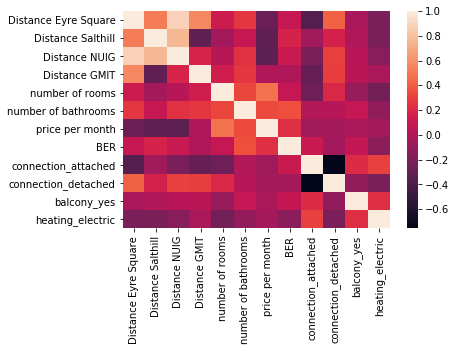

In [36]:
sns.heatmap(df.corr());


In [37]:
df.corr() #correlcation matric, similar to above but just the numbers 

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.525509,0.882247,0.564174,0.121889,0.263539,-0.269972,0.096117,-0.365228,0.422863,-0.027432,-0.212817
Distance Salthill,0.525509,1.000000,0.759916,-0.317061,-0.036604,0.098202,-0.323853,0.174960,-0.054214,0.165912,0.008324,-0.201624
Distance NUIG,0.882247,0.759916,1.000000,0.180731,0.033170,0.244686,-0.324428,0.113552,-0.211373,0.305512,0.044591,-0.158733
Distance GMIT,0.564174,-0.317061,0.180731,1.000000,0.146162,0.264761,0.011206,-0.001121,-0.294297,0.289404,0.051518,-0.017418
number of rooms,0.121889,-0.036604,0.033170,0.146162,1.000000,0.323760,0.482373,0.090056,-0.258393,0.203392,-0.087020,-0.240975
number of bathrooms,0.263539,0.098202,0.244686,0.264761,0.323760,1.000000,0.337433,0.352494,0.016072,0.033439,0.092402,-0.116263
price per month,-0.269972,-0.323853,-0.324428,0.011206,0.482373,0.337433,1.000000,0.236617,-0.067945,-0.044520,-0.017026,-0.037695
BER,0.096117,0.174960,0.113552,-0.001121,0.090056,0.352494,0.236617,1.000000,0.110468,-0.046827,0.081472,-0.138957
connection_attached,-0.365228,-0.054214,-0.211373,-0.294297,-0.258393,0.016072,-0.067945,0.110468,1.000000,-0.756245,0.216099,0.303708
connection_detached,0.422863,0.165912,0.305512,0.289404,0.203392,0.033439,-0.044520,-0.046827,-0.756245,1.000000,-0.115969,-0.208037


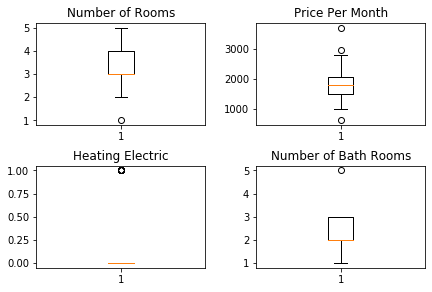

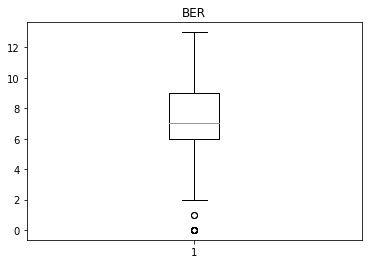

In [40]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['number of bathrooms'])
axs[1, 1].set_title('Number of Bath Rooms')

axs[1, 0].boxplot(df['heating_electric'])
axs[1, 0].set_title('Heating Electric')








fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)



fig, ax = plt.subplots()
ax.boxplot(df['BER'])
ax.set_title('BER')


plt.show()

mid inverse, distance es, s, c, no effect gmit. mid rooms, baths, low + ber, nothing for detached low postive lone, nothing balcony 


In [42]:
#robust_scaler = RobustScaler()
MinMax_scaler = MinMaxScaler()
df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']] = MinMax_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']])



In [44]:
df['BER'] = df['BER']/15


In [46]:
df.BER.unique() 

array([0.6       , 0.4       , 0.66666667, 0.33333333, 0.53333333,
       0.        , 0.8       , 0.13333333, 0.46666667, 0.73333333,
       0.26666667, 0.86666667, 0.06666667])

In [47]:
df.corr()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.525509,0.882247,0.564174,0.121889,0.263539,-0.269972,0.096117,-0.365228,0.422863,-0.027432,-0.212817
Distance Salthill,0.525509,1.000000,0.759916,-0.317061,-0.036604,0.098202,-0.323853,0.174960,-0.054214,0.165912,0.008324,-0.201624
Distance NUIG,0.882247,0.759916,1.000000,0.180731,0.033170,0.244686,-0.324428,0.113552,-0.211373,0.305512,0.044591,-0.158733
Distance GMIT,0.564174,-0.317061,0.180731,1.000000,0.146162,0.264761,0.011206,-0.001121,-0.294297,0.289404,0.051518,-0.017418
number of rooms,0.121889,-0.036604,0.033170,0.146162,1.000000,0.323760,0.482373,0.090056,-0.258393,0.203392,-0.087020,-0.240975
number of bathrooms,0.263539,0.098202,0.244686,0.264761,0.323760,1.000000,0.337433,0.352494,0.016072,0.033439,0.092402,-0.116263
price per month,-0.269972,-0.323853,-0.324428,0.011206,0.482373,0.337433,1.000000,0.236617,-0.067945,-0.044520,-0.017026,-0.037695
BER,0.096117,0.174960,0.113552,-0.001121,0.090056,0.352494,0.236617,1.000000,0.110468,-0.046827,0.081472,-0.138957
connection_attached,-0.365228,-0.054214,-0.211373,-0.294297,-0.258393,0.016072,-0.067945,0.110468,1.000000,-0.756245,0.216099,0.303708
connection_detached,0.422863,0.165912,0.305512,0.289404,0.203392,0.033439,-0.044520,-0.046827,-0.756245,1.000000,-0.115969,-0.208037


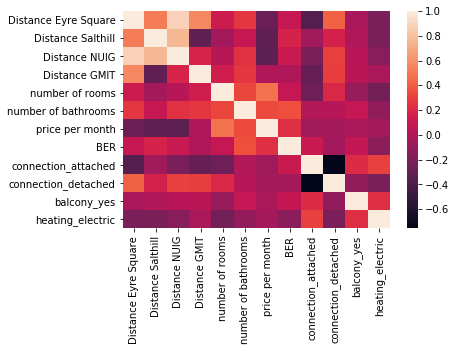

In [48]:
df_new=df.rename(columns={'pricer per month': 'price per month'})
df_new=df_new.rename(columns={'number of baths rooms': 'number of bath rooms'})
sns.heatmap(df_new.corr());

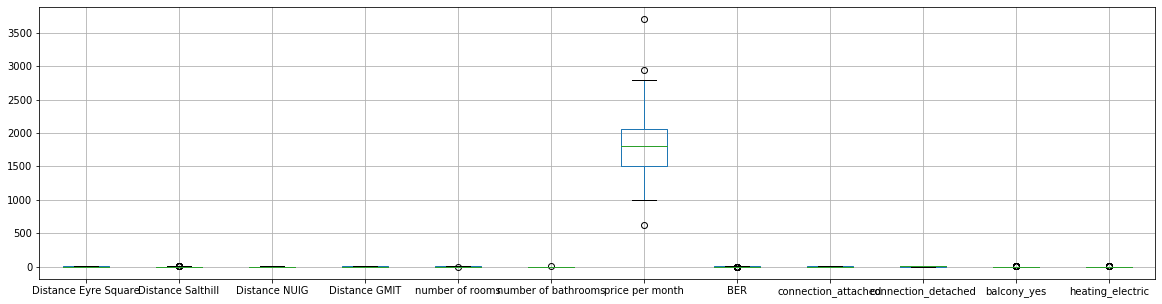

In [49]:
df.boxplot(figsize=(20,5))
plt.show() 

In [52]:
df.describe()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,balcony_yes,heating_electric
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.462630,0.365632,0.346095,0.480381,0.615234,0.300781,1835.054688,0.450521,0.281250,0.593750,0.093750,0.070312
std,0.264257,0.206319,0.230676,0.271148,0.195678,0.186554,457.764257,0.218120,0.451376,0.493062,0.292626,0.256678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278047,0.219506,0.158982,0.269550,0.500000,0.250000,1500.000000,0.400000,0.000000,0.000000,0.000000,0.000000
50%,0.440107,0.331967,0.274194,0.484405,0.500000,0.250000,1800.000000,0.466667,0.000000,1.000000,0.000000,0.000000
75%,0.691389,0.473976,0.527018,0.655744,0.750000,0.500000,2057.500000,0.600000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3700.000000,0.866667,1.000000,1.000000,1.000000,1.000000


In [53]:
import statsmodels.api as sn 

In [54]:
X = sn.add_constant(df['number of rooms'])

In [55]:
ln=sn.OLS(df['price per month'],X).fit()

In [56]:
ln.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     38.21
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           8.13e-09
Time:                        16:29:16   Log-Likelihood:                -948.34
No. Observations:                 128   AIC:                             1901.
Df Residuals:                     126   BIC:                             1906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1140.7903    117.818      9.683      0.000     907.632    1373.949
number of rooms  1128.4551    182.559      6.181      0.000     767.177    1489.733
==============================================================================
Omnibus:                       18.001   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.657
Skew:                           0.752   Prob(JB):                     4.42e-06
Kurtosis:                       4.536   Cond. No.                         7.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y=df['price per month']

In [58]:
x=df[['number of rooms']]

In [59]:
ln2=LinearRegression()

In [60]:
ln2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(ln2.intercept_,ln2.coef_)

1140.790340395622 [1128.45506577]


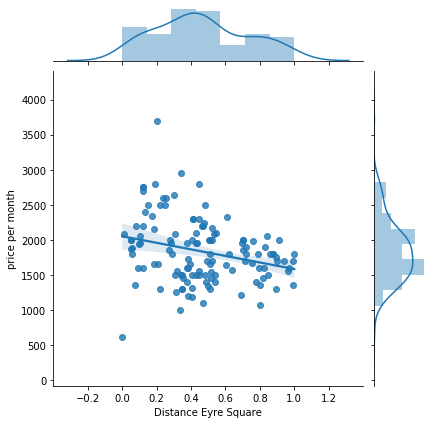

In [67]:
sns.jointplot(x=df['Distance Eyre Square'],y=df['price per month'],data=df,kind='reg')

In [68]:
x_multi=df.drop('price per month',axis=1) 



In [69]:
x_multi.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,connection_attached,connection_detached,balcony_yes,heating_electric
13,0.445973,0.120132,0.267824,0.608024,0.75,0.50,0.600000,0,1,0,0
17,0.478989,0.178091,0.273865,0.633449,0.50,0.50,0.400000,0,1,0,0
18,0.347422,0.229970,0.110599,0.528600,0.50,0.00,0.666667,1,0,0,0
19,0.218543,0.069994,0.174749,0.427021,1.00,0.25,0.333333,0,1,0,0
21,0.000000,0.246776,0.114896,0.292830,0.50,0.25,0.666667,1,0,1,0


In [70]:
y_multi = df['price per month']

In [71]:
y_multi.head()

13    2800
17    1500
18    1300
19    2500
21     620
Name: price per month, dtype: int64

In [72]:
x_multi_cons=sn.add_constant(x_multi) 

In [73]:
x_multi_cons.head() 

,const,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,connection_attached,connection_detached,balcony_yes,heating_electric
13,1.0,0.445973,0.120132,0.267824,0.608024,0.75,0.50,0.600000,0,1,0,0
17,1.0,0.478989,0.178091,0.273865,0.633449,0.50,0.50,0.400000,0,1,0,0
18,1.0,0.347422,0.229970,0.110599,0.528600,0.50,0.00,0.666667,1,0,0,0
19,1.0,0.218543,0.069994,0.174749,0.427021,1.00,0.25,0.333333,0,1,0,0
21,1.0,0.000000,0.246776,0.114896,0.292830,0.50,0.25,0.666667,1,0,1,0


In [74]:
ln_multi=sn.OLS(y_multi,x_multi_cons).fit()


In [75]:
ln_multi.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           7.95e-13
Time:                        16:29:54   Log-Likelihood:                -921.96
No. Observations:                 128   AIC:                             1868.
Df Residuals:                     116   BIC:                             1902.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1488.8104    191.334      7.781      0.000    1109.849    1867.771
Distance Eyre Square  -273.5446    672.683     -0.407      0.685   -1605.878    1058.788
Distance Salthill     -560.7078    374.281     -1.498      0.137   -1302.018     180.603
Distance NUIG         -153.2393    567.803     -0.270      0.788   -1277.845     971.367
Distance GMIT         -215.6639    378.889     -0.569      0.570    -966.101     534.773
number of rooms        903.8809    175.762      5.143      0.000     555.763    1251.999
number of bathrooms    673.6659    204.287      3.298      0.001     269.050    1078.282
BER                    420.3448    153.941      2.731      0.007     115.445     725.244
connection_attached   -223.0933    111.811     -1.995      0.048    -444.549      -1.638
connection_detached    -99.4181     97.809     -1.016      0.312    -293.141      94.305
balcony_yes              6.7834    115.583      0.059      0.953    -222.143     235.710
heating_electric       106.4215    135.166      0.787      0.433    -161.291     374.134
==============================================================================
Omnibus:                       21.255   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.369
Skew:                           0.436   Prob(JB):                     1.58e-17
Kurtosis:                       6.708   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

number of rooms,
baths
ber
and connectiong detached seems important 
a lot of the P values are pretty big, larger than the .5 we were looking for 


In [76]:
lm3=LinearRegression()

In [77]:
lm3.fit(x_multi,y_multi)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(lm3.intercept_,lm3.coef_) 


1488.8104138379779 [-273.54463373 -560.70777085 -153.23925947 -215.66389996  903.88093858
  673.66591327  420.34477272 -223.09330368  -99.41812317    6.78336426
  106.42150601]


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test =train_test_split(x_multi,y_multi, test_size = 0.2,random_state=0)

In [81]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) 

(102, 11) (26, 11) (102,) (26,)


In [82]:
ln_a =LinearRegression()

In [83]:
ln_a.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
Y_test_a=ln_a.predict(X_test)

In [85]:
Y_train_a=ln_a.predict(X_train)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2_score(Y_test,Y_test_a)

-0.0288384309869536

In [88]:
r2_score(Y_train,Y_train_a)

0.5559774127346002

In [89]:
y_pred=ln_a.predict(X_test)

In [90]:
print(ln_a.intercept_,ln_a.coef_)

1417.99528491187 [ 177.22139279 -127.77716678 -847.30596862 -293.69856599 1080.54871991
  747.141544    192.23421434 -286.14687738 -159.59620988  -19.76231735
  205.91259589]


In [91]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [92]:
from sklearn import metrics 

print('R2:',r2_score(Y_test,Y_test_a))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('Root Mean Square Percentage Error:', rmse(Y_test, y_pred))

R2: -0.0288384309869536
RMSE: 413.20822113006665
Root Mean Square Percentage Error: 21.381369906186826


In [93]:
from sklearn import preprocessing 

In [94]:
scaler=preprocessing.StandardScaler().fit(X_train) 

In [95]:

X_train_s=X_train

In [96]:

X_test_s=X_test

In [97]:
from sklearn.linear_model import Ridge

In [98]:
ln_r=Ridge(alpha=0.5)
ln_r.fit(X_train_s,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
r2_score(Y_test,ln_r.predict(X_test_s))

0.06318353124429887

In [100]:
print(ln_r.intercept_,ln_r.coef_) 

1453.8945360291589 [-238.87670585 -138.19253263 -419.29004172  -96.0606258   989.42100575
  617.44687308  205.16145373 -273.49338793 -141.10404757  -41.87598167
  147.22277037]


In [101]:
y_pred3=ln_r.predict(X_test_s)

In [102]:
from sklearn import metrics 
print('R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('Root Mean Square Percentage Error:', rmse(Y_test, y_pred3))

R2: 0.06318353124429887
MAE: 306.39783213107575
MSE: 155469.51565467025
RMSE: 394.2962283038861
Root Mean Square Percentage Error: 20.77767567084367


still very low r2, rmse is much higher 

In [103]:
from sklearn.model_selection import validation_curve

In [104]:
param_range=np.logspace(-2,8,100) #creates 100 values

In [105]:
param_range


array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [106]:
train_scores,test_scores=validation_curve(Ridge(),X_train_s,Y_train,"alpha",param_range,scoring='r2')

In [107]:
print(train_scores)
print(test_scores)

[[5.49469674e-01 6.30053890e-01 5.26795931e-01 6.00887242e-01
  5.34807540e-01]
 [5.49379664e-01 6.30051132e-01 5.26792217e-01 6.00866986e-01
  5.34770844e-01]
 [5.49250476e-01 6.30046819e-01 5.26786420e-01 6.00837211e-01
  5.34716930e-01]
 [5.49069052e-01 6.30040098e-01 5.26777405e-01 6.00794175e-01
  5.34639074e-01]
 [5.48820556e-01 6.30029649e-01 5.26763445e-01 6.00733147e-01
  5.34528868e-01]
 [5.48489603e-01 6.30013450e-01 5.26741922e-01 6.00648422e-01
  5.34376346e-01]
 [5.48062138e-01 6.29988393e-01 5.26708901e-01 6.00533432e-01
  5.34170415e-01]
 [5.47527628e-01 6.29949710e-01 5.26658496e-01 6.00380913e-01
  5.33899540e-01]
 [5.46880855e-01 6.29890089e-01 5.26581964e-01 6.00182956e-01
  5.33552449e-01]
 [5.46122336e-01 6.29798330e-01 5.26466404e-01 5.99930630e-01
  5.33118387e-01]
 [5.45256492e-01 6.29657338e-01 5.26292914e-01 5.99612778e-01
  5.32586259e-01]
 [5.44287072e-01 6.29441173e-01 5.26033968e-01 5.99213571e-01
  5.31942032e-01]
 [5.43209992e-01 6.29110810e-01 5.256497

In [108]:
train_mean=np.mean(train_scores,axis=1)

In [109]:
test_mean=np.mean(test_scores,axis=1)

In [110]:
train_mean

array([5.68402855e-01, 5.68372169e-01, 5.68327571e-01, 5.68263961e-01,
       5.68175133e-01, 5.68053949e-01, 5.67892656e-01, 5.67683257e-01,
       5.67417663e-01, 5.67087218e-01, 5.66681156e-01, 5.66183563e-01,
       5.65568601e-01, 5.64793890e-01, 5.63792046e-01, 5.62460411e-01,
       5.60649226e-01, 5.58149066e-01, 5.54679423e-01, 5.49881830e-01,
       5.43322419e-01, 5.34509436e-01, 5.22930022e-01, 5.08106797e-01,
       4.89668813e-01, 4.67425088e-01, 4.41424944e-01, 4.11990061e-01,
       3.79708737e-01, 3.45391445e-01, 3.09995218e-01, 2.74530267e-01,
       2.39964552e-01, 2.07141051e-01, 1.76718912e-01, 1.49144299e-01,
       1.24650604e-01, 1.03282333e-01, 8.49337723e-02, 6.93930941e-02,
       5.63843687e-02, 4.56027723e-02, 3.67410776e-02, 2.95075557e-02,
       2.36365776e-02, 1.88936420e-02, 1.50765170e-02, 1.20139148e-02,
       9.56277809e-03, 7.60493443e-03, 6.04360860e-03, 4.80008797e-03,
       3.81069621e-03, 3.02414066e-03, 2.39924371e-03, 1.90303664e-03,
      

In [111]:
max(test_mean)

0.30975670873908323

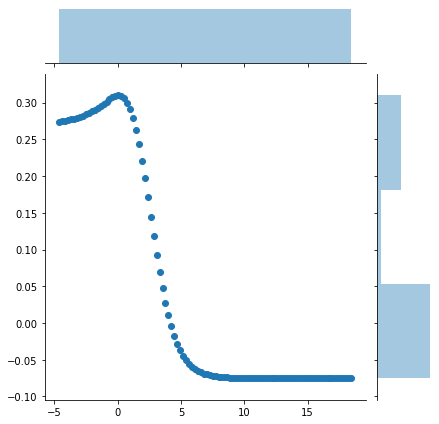

In [112]:
sns.jointplot(x=np.log(param_range),y=test_mean) #highest point is from the max above 

In [113]:
np.where(test_mean==max(test_mean))

(array([20]),)

In [114]:
param_range[20]

1.0476157527896652

In [115]:
ln_r_best=Ridge(alpha=param_range[20])

In [116]:
ln_r_best.fit(X_train_s,Y_train)

Ridge(alpha=1.0476157527896652, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
r2_score(Y_test,ln_r_best.predict(X_test_s))

0.10033737670487686

In [118]:
r2_score(Y_train,ln_r_best.predict(X_train_s))

0.5388332917703802

In [119]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)



In [120]:
print ("Ridge model Best:", pretty_print_coefs(ln_r_best.coef_)) #https://www.datacamp.com/community/tutorials/feature-selection-python

Ridge model Best: -262.514 * X0 + -160.907 * X1 + -352.701 * X2 + -69.352 * X3 + 893.628 * X4 + 548.15 * X5 + 199.92 * X6 + -256.994 * X7 + -127.919 * X8 + -42.149 * X9 + 113.791 * X10


In [121]:
ln_r_best.coef_

array([-262.5138845 , -160.906864  , -352.70140596,  -69.35154885,
        893.62776872,  548.1501346 ,  199.9203965 , -256.99382077,
       -127.91853172,  -42.14935702,  113.79058986])

In [122]:
# info about ridge method https://machinelearningmastery.com/ridge-regression-with-python/ https://scikit-learn.org/stable/modules/linear_model.html
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html As expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection!

In [123]:
y_pred2=ln_r_best.predict(X_test)

In [124]:
from sklearn import metrics 
print('R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))
print('RMSPE:', rmse(Y_test, y_pred2))

R2: 0.10033737670487686
RMSE: 386.39829675495344
RMSPE: 20.592051152292655


In [125]:
print('* 1 R2:',r2_score(Y_test,Y_test_a))
print('* 2 R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('* 3 R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('')
print('* 1 MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('* 2 MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('* 3 MAE:', metrics.mean_absolute_error(Y_test,y_pred2))
print('')
print('* 1 MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('* 2 MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('* 3 MSE:',metrics.mean_squared_error(Y_test,y_pred2))
print('')
print('* 1 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('* 2 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('* 3 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

# here is looks like hte simple linergression has done the best job 

* 1 R2: -0.0288384309869536
* 2 R2: 0.06318353124429887
* 3 R2: 0.10033737670487686

* 1 MAE: 317.58347812783575
* 2 MAE: 306.39783213107575
* 3 MAE: 301.9554796926721

* 1 MSE: 170741.03400947404
* 2 MSE: 155469.51565467025
* 3 MSE: 149303.64373512904

* 1 RMSE: 413.20822113006665
* 2 RMSE: 394.2962283038861
* 3 RMSE: 386.39829675495344


balcony_no, heating_electric, connection_attached

* 1 R2: 0.4018913080643862
* 2 R2: 0.40441837716372475
* 3 R2: 0.4039092200528832

* 1 MAE: 298.40242201478765
* 2 MAE: 428.78946586995517
* 3 MAE: 431.0472423037489

* 1 MSE: 230098.80756954738
* 2 MSE: 268892.83504856785
* 3 MSE: 272384.24294414476

* 1 RMSE: 479.6861552823339
* 2 RMSE: 518.5487778874499
* 3 RMSE: 521.9044385173829

Linear regression has the best RMSE and R2

--------------------------

balcony_yes, heating_electric, connection_attached

* 1 R2: 0.4018913080643862
* 2 R2: 0.40441837716372475
* 3 R2: 0.4039092200528833

* 1 MAE: 298.40242201478753
* 2 MAE: 436.1756715962482
* 3 MAE: 439.417839657691

* 1 MSE: 230098.80756954738
* 2 MSE: 272056.8483329807
* 3 MSE: 275961.18048965855

* 1 RMSE: 479.6861552823339
* 2 RMSE: 521.5906904201614
* 3 RMSE: 525.3200743257947





----------------------------

balcony_yes, heating_central, connection_attached

* 1 R2: 0.401891308064386
* 2 R2: 0.40441837716372475
* 3 R2: 0.3397477571148829

* 1 MAE: 298.4024220147877
* 2 MAE: 460.1771354043641
* 3 MAE: 438.2487465067006

* 1 MSE: 230098.80756954747
* 2 MSE: 284430.9434177551
* 3 MSE: 293952.97139508673

* 1 RMSE: 479.686155282334
* 2 RMSE: 533.3206759706163
* 3 RMSE: 542.1742998290188

 not much of a change 
 
 
 -----------------------------
 
 balcony_yes, heating_central, connection_lone
 
* 1 R2: 0.401891308064386
* 2 R2: 0.40550919986046285
* 3 R2: 0.3589006634688163

* 1 MAE: 298.40242201478753
* 2 MAE: 385.0358991130297
* 3 MAE: 412.1382273330243

* 1 MSE: 230098.80756954747
* 2 MSE: 257897.8513467013
* 3 MSE: 283441.5304840219

* 1 RMSE: 479.686155282334
* 2 RMSE: 507.8364415308351
* 3 RMSE: 532.3922712474533

not a lot of change here 


-------------------------------

* 1 R2: 0.401891308064386
* 2 R2: 0.40550919986046274
* 3 R2: 0.3589006634688163

* 1 MAE: 298.4024220147876
* 2 MAE: 432.8097560324263
* 3 MAE: 452.3000463079552

* 1 MSE: 230098.80756954747
* 2 MSE: 343181.76941160636
* 3 MSE: 349533.1635432941

* 1 RMSE: 479.686155282334
* 2 RMSE: 585.8171808777943
* 3 RMSE: 591.2132978403769

different scaling didn't seem to make much of a difference minmax used on this run 

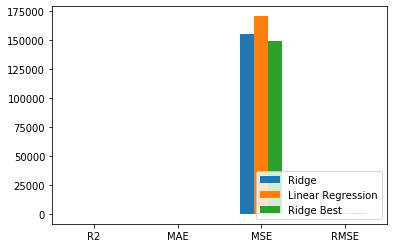

In [126]:
LR_metrics =np.array([r2_score(Y_test,Y_test_a),metrics.mean_absolute_error(Y_test,y_pred),metrics.mean_squared_error(Y_test,y_pred),np.sqrt(metrics.mean_squared_error(Y_test,y_pred))])
R_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred3),metrics.mean_squared_error(Y_test,y_pred3),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3))])
RB_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred2),metrics.mean_squared_error(Y_test,y_pred2),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2))])
index = ['R2', 'MAE', 'MSE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics, 'Linear Regression': LR_metrics,'Ridge Best': RB_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()


In [127]:
LR_metrics2=np.delete(LR_metrics,2)
R_metrics2=np.delete(R_metrics,2)
RB_metrics2=np.delete(RB_metrics,2)


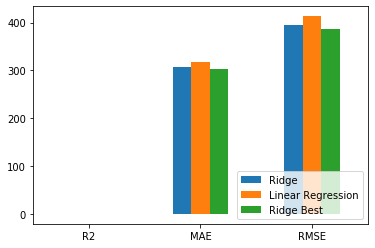

In [128]:
index = ['R2', 'MAE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics2, 'Linear Regression': LR_metrics2,'Ridge Best': RB_metrics2}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

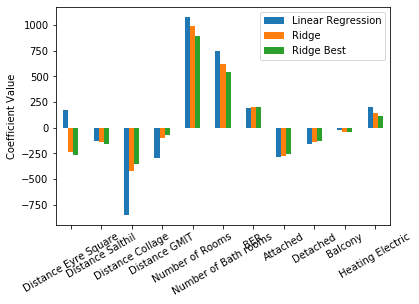

In [129]:
index3=['Distance Eyre Square','Distance Salthil','Distance Collage','Distance GMIT','Number of Rooms','Number of Bath rooms','BER','Attached','Detached','Balcony','Heating Electric']
All_coef=pd.DataFrame({'Linear Regression': ln_a.coef_, 'Ridge': ln_r.coef_, 'Ridge Best': ln_r_best.coef_}, index=index3)

All_coef.plot.bar(rot=0)



plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Coefficient Value')
plt.legend(loc="upper right")
plt.show()


LN does the best but the r2 is still hella poor

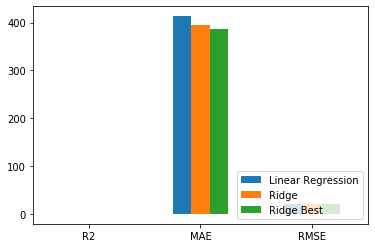

In [130]:
LR2_metrics =np.array([r2_score(Y_test,Y_test_a),np.sqrt(metrics.mean_squared_error(Y_test,y_pred)),rmse(Y_test,y_pred)])
R2_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)),rmse(Y_test,y_pred3)])
RB2_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)),rmse(Y_test,y_pred2)])

df_metrics2 = pd.DataFrame({'Linear Regression': LR2_metrics,'Ridge': R2_metrics, 'Ridge Best': RB2_metrics}, index=index)
df_metrics2.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

In [131]:
df_metrics2

,Linear Regression,Ridge,Ridge Best
R2,-0.028838,0.063184,0.100337
MAE,413.208221,394.296228,386.398297
RMSE,21.381370,20.777676,20.592051
